In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [2]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<AxesSubplot:>

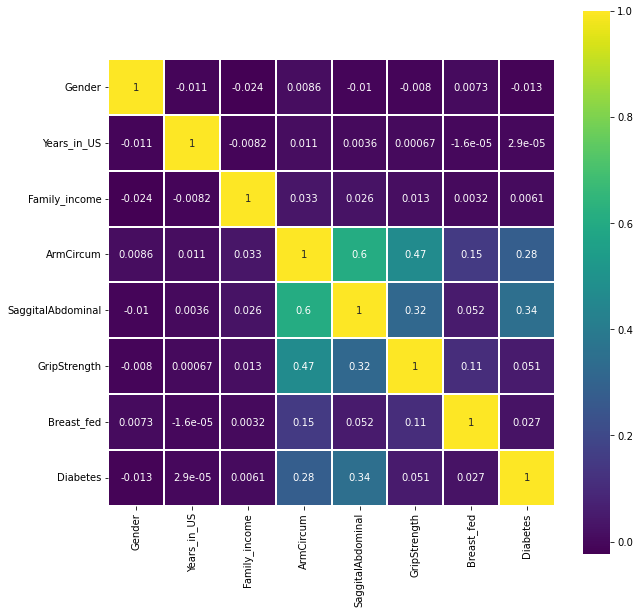

In [3]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [4]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [25]:
### Воспользуемся StandardScaler

### Your code is here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_sc=scaler.transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_sc,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [26]:
### Your code is here
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=3, tol = 0.0005, random_state=1).fit(X_train)
kmeans.labels_

accuracy_score(y_test, kmeans.predict(X_test))

0.3076609616951915

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [27]:
### Your code is here
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.8859005704971475

In [28]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state = 1)
clf_LR.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_LR.predict(X_test))

0.8875305623471883

In [29]:
from sklearn.svm import LinearSVC

clf_SVC = LinearSVC(random_state = 1)
clf_SVC.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_SVC.predict(X_test))

0.8920130399348003

Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [34]:
X_train=np.insert(X_train, X_train.shape[1], kmeans.labels_, axis=1)
X_test=np.insert(X_test, X_test.shape[1], kmeans.predict(X_test), axis=1)

In [35]:
### Your code is here
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))


0.8875305623471883

In [36]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state = 1)
clf_LR.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_LR.predict(X_test))

0.8895680521597392

In [37]:
from sklearn.svm import LinearSVC

clf_SVC = LinearSVC(random_state = 1)
clf_SVC.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf_SVC.predict(X_test))

0.8920130399348003

Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [ ]:
### Your code is here




**Задание 2** Задача кластеризации может использоваться не только для специфических задач группировки данных, но и для оптимизации других методов. Вы уже знаете, что одна из основных проблем kNN в скорости его предсказания. В этом задании попробуем ускорить работу kNN с помощью кластеризации, не теряя при этом сильно в качестве.

Сначала загрузим уже известные вам данные клиентов страховой компании.

In [ ]:
data = pd.read_csv('processed_vehicle_inssurance.csv')
data.head()

In [ ]:
### Разделим выборку на трейн-тест

from sklearn.model_selection import train_test_split
X = data.drop('Response', axis=1)[:25000]
y = data['Response'][:25000]

X_train, X_test, y_train, y_test = train_test_split(X, y.values,
                                                    random_state=0,
                                                    test_size=0.2)

In [ ]:
### Нормируем данные

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите обычный kNN с одним соседом и измерьте качество, например, взвешенную f-меру, чтобы потом сравнить с нашей реализацией (1б).

In [ ]:
### Your code is here



Идея ускорения kNN заключается в том, чтобы разбить признаковое пространство (то есть столбцы, а не объекты-строки!) на несколько блоков и кластеризовать каждый блок по-отдельности.

Далее нужно будет заменить в обучающей выборке объекты на их некоторое представление, а именно вместо каждого блока вставить центр кластера, к которому принадлежит эта часть исходного объекта.

Затем подсчет расстояний на этапе применения производится по блокам. Главный плюс алгоритма в том, что у нас уже будут иметься предподсчитанные расстояния по блокам до всех центров кластеров.

Этот алгоритм называется **Product Quantization**. 


Сам алгоритм:

1. Разделите обучающую и контрольную выборки на блоки: равномерно по индексам столбцов.


2. На каждом блоке обучите K-Means и примените transform к соотв. блоку контрольной выборки.


3. Посчитайте расстояния от каждого обучающего объекта до каждого объекта из контрольной выборки
(это вы должны сделать, используя матрицы из предыдущего пункта)


4. Определите для каждого тестового объекта k ближайших

В нашей реализации будем использовать следующие значения параметров: \
`m_blocks` = 5 \
`n_clusters` = 100 \
`k` = 1

**Совет на будущее в практике:** Обучайте все на подвыборке данных, так как итоговая матрица при подсчете kNN будет занимать очень много оперативной памяти. 


In [ ]:
def product_quantization(X_train, X_test, m_blocks=5, n_clusters=100):
    dist_table = np.zeros([X_test.shape[0], n_clusters, m_blocks])
    X_train_clusters = np.zeros([X_train.shape[0], m_blocks])
    
    for i in range(m_blocks):
        ### Вырежьте блок из обучающей и контрольной выборок
        block_size = X_test.shape[1] // m_blocks
        X_train_block = X_train[:, i*block_size:(i+1)*block_size].copy()
        X_test_block = X_test[:, i*block_size:(i+1)*block_size].copy()
        
        ### Обучите K-Means и примените transform на тестовой выборке
        ### Положите посчитанные расстояния до центров в матрицу dist_table
        kmeans = KMeans(n_clusters=n_clusters).fit(X_train_block)
        dist_table[:, :, i] = kmeans.transform(X_test_block)
        
        ### Положите метки кластеров в матрицу X_train_clusters
        X_train_clusters[:, i] = kmeans.predict(X_train_block)
        
    return X_train_clusters, dist_table

X_train_clusters, dist_table = product_quantization(X_train, X_test, 
                                                    m_blocks=5, 
                                                    n_clusters=100)

Теперь с помощью полученных таблиц осталось посчитать расстояния до каждого объекта обучающей выборки. 
1. Сначала возведите в квадрат `dist_table`, чтобы получить сумму квадратов, а не l2-норму.

2. Для каждого блока по предсказанным меткам класса в `X_train_clusters` отберите соответсвтующие расстояния из dist_table

3. Просуммируйте квадраты расстояний по всем блокам.

4. Найдите индексы самых маленький расстояний и по ним выберите объекты из y_train, это и будут наши предсказания

Замерьте качество, как изменилась скорость работы? (2б)

In [ ]:
### Your code is here




Наша реализация на python работает медленнее по сравнению с библиотечным kNN. Однако реализация на более низкоуровневых языках программирования (C++) и на большом количестве данных данный метод на самом деле позволяет ускорять подсчет расстояний.